In [5]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from sklearn.preprocessing import MinMaxScaler, minmax_scale
from sklearn.model_selection import train_test_split

In [3]:
root = "C:\\Users\\FT-LT55\\Documents\\ML\\NFL\\"

Beginning looking at data

In [4]:
data_raw = pd.read_csv(root + "data\\full_combine_data.csv")

In [37]:
data_raw.head()

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,pro bowl?
0,John Abraham,OLB,76,252,4.55,NaN,NaN,NaN,NaN,NaN,1
1,Shaun Alexander,RB,72,218,4.58,NaN,NaN,NaN,NaN,NaN,1
2,Darnell Alford,OT,76,334,5.56,25.0,23.0,94.0,8.48,4.98,0
3,Kyle Allamon,TE,74,253,4.97,29.0,NaN,104.0,7.29,4.49,0
4,Rashard Anderson,CB,74,206,4.55,34.0,NaN,123.0,7.18,4.15,0


In [38]:
data_raw.describe()

,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,pro bowl?
count,6823.000000,6823.000000,6653.000000,5260.000000,4629.000000,5206.000000,4600.000000,4670.000000,6823.000000
mean,73.814305,242.986077,4.880455,32.886977,20.830633,114.330196,7.349841,4.836351,0.084274
std,2.616383,44.966869,0.778796,4.200754,6.362080,9.320295,0.960176,1.445667,0.277818
min,65.000000,149.000000,4.220000,17.500000,2.000000,74.000000,3.970000,3.730000,0.000000
25%,72.000000,206.000000,4.540000,30.000000,16.000000,109.000000,6.960000,4.210000,0.000000
50%,74.000000,233.000000,4.710000,33.000000,21.000000,115.000000,7.200000,4.390000,0.000000
75%,76.000000,279.000000,5.000000,36.000000,25.000000,121.000000,7.620000,4.670000,0.000000
max,82.000000,375.000000,9.990000,46.000000,49.000000,147.000000,9.990000,9.990000,1.000000


The 9.99 values are in place of empty data. They will have to be removed or replaced

In [39]:
data_raw.loc[data_raw["Cone"] == 9.99]

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,pro bowl?
6217,Nasir Adderley,S,72,206,9.99,NaN,NaN,NaN,9.99,9.99,0
6218,Azeez Al-Shaair,LB,73,234,9.99,NaN,16.0,NaN,9.99,9.99,0
6219,Otaro Alaka,LB,75,239,4.82,36.0,20.0,131.0,9.99,9.99,0
6223,Bryson Allen-Williams,LB,73,236,4.88,NaN,14.0,NaN,9.99,7.40,0
6226,Rodney Anderson,RB,72,224,9.99,NaN,25.0,NaN,9.99,9.99,0
...,...,...,...,...,...,...,...,...,...,...,...
6810,Jedrick Wills,OL,77,320,5.05,34.5,NaN,113.0,9.99,4.84,0
6814,Antoine Winfield,S,70,205,4.45,36.0,NaN,124.0,9.99,9.99,1
6819,Dom Wood-Anderson,TE,76,257,4.92,35.0,NaN,119.0,9.99,9.99,0
6821,Chase Young,DL,77,265,9.99,NaN,NaN,NaN,9.99,9.99,1


We can see there are 289 rows of data with missing cones. Considering we have over 6000 samples it might be possible to simply drop these rows. But for now we won't be touching the data and all we're doing is validating the dataset

In [40]:
profile = ProfileReport(data_raw, title="NFL Data Report")

In [41]:
profile.to_file("NFL_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 55.70it/s]


From the writeup, the first thing that sticks out is about the Names, which should be unique. Although that's not the case and in some instances we have people with the same name. Since these cases are few (5) I can go through by hand and select what to do with the data. 

In the first case for Kyle Murphy I decided to just drop the first row which is missing much more data than the second. For Mike Bell it's a bit more difficult as both have full data available. In this case I have decided to append the position onto the name "Mike Bell-RB" and "Mike Bell-S".

For Brandon Jones one of the rows once again has many null values so it's easier to just drop the incomplete one.

Josh Allen the same idea is used of pinning on the player position.

Now for Stanford Samuels both players are missing the same amount of data, and both players have the same position. For now I think we can keep these rows since they at least have 40 time. They can be excluded later if needed. As for changing the name, it's probably best to just make a Stanford Samuels 1 and 2.

With that we've cleared up and discrepancies relating to the names of the data

It appears that there's a bit more I overlooked... I see once again a handful of cases which is not too painful to manually check out. We'll use most of the same criteria.

For a handful it was a time to also check the labels; Players sharing the same name both ended up marked as pro bowlers, when only one of the players actually was (For example, A.J. Green the WR vs A.J. Green the CB)

Even though the methods may seem meticulous, it's important to make sure that our *raw* data is of sufficient quality the best that we can.

In [5]:
data_complete = data_raw.dropna()

In [6]:
data_complete.loc[data_complete["pro bowl?"] == 1]

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,pro bowl?
31,Mike Brown,SS,70,204,4.59,36.0,14.0,116.0,6.93,4.01,1
57,Chad Clifton,OT,77,334,5.05,30.5,24.0,102.0,7.58,4.73,1
106,Kabeer Gbaja-Biamila,OLB,76,243,4.65,34.0,21.0,120.0,6.90,4.28,1
108,Ian Gold,OLB,73,221,4.56,33.0,21.0,115.0,6.97,4.19,1
271,Marvel Smith,OT,77,320,5.37,27.5,24.0,100.0,7.87,4.83,1
...,...,...,...,...,...,...,...,...,...,...,...
6254,A.J. Brown,WR,72,226,4.49,36.5,19.0,120.0,9.99,9.99,1
6341,Mecole Hardman,WR,70,187,4.33,36.5,17.0,119.0,9.99,9.99,1
6355,T.J. Hockenson,TE,77,251,4.70,37.5,17.0,123.0,4.18,7.02,1
6373,Elgton Jenkins,OL,76,310,9.99,28.0,29.0,109.0,4.62,7.77,1


In [7]:
data_complete.loc[data_complete["pro bowl?"] == 0]

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,pro bowl?
2,Darnell Alford,OT,76,334,5.56,25.0,23.0,94.0,8.48,4.98,0
7,Corey Atkins,OLB,72,237,4.72,31.0,21.0,112.0,7.96,4.39,0
9,Reggie Austin,CB,69,175,4.44,35.0,17.0,119.0,7.03,4.14,0
11,Mark Baniewicz,OT,78,312,5.34,28.0,20.0,96.0,7.72,4.73,0
12,Rashidi Barnes,FS,72,208,4.62,35.0,10.0,114.0,6.92,4.32,0
...,...,...,...,...,...,...,...,...,...,...,...
6815,Tristan Wirfs,OL,77,322,4.85,36.5,24.0,121.0,7.65,4.68,0
6817,Charlie Woerner,TE,77,245,4.78,34.5,21.0,120.0,7.18,4.46,0
6818,D.J. Wonnum,DL,77,254,4.73,34.5,20.0,123.0,7.25,4.44,0
6820,David Woodward,LB,74,235,4.79,33.5,16.0,114.0,7.34,4.37,0


In [1]:
1 - (265/(2955 + 265))

0.9177018633540373

91% accuracy by just predicting "no" for everything means there's very slim margins for improvement. However, what we can aim for is High recall. If we have false positives, that's fine. As recruiters we want to know who has the best potential to end up as a pro bowler. In many sports, NFL included, players can end up being solid additions, but not end up getting pro bowl accolades for various reasons; sometimes the position is just saturated with talent and players get overlooked. So it's ok if we say this guy has "pro bowl potential". What we don't want is to mislabel a potential pro bowler as not having talent, that means another agent/team can scoop them up!

Of course this is only including those players with all data complete. We'll work with this first just to get a baseline and then later we can deal with the larger dataset and impute values.

In [13]:
data_complete["Pos"].unique()

array(['OT', 'OLB', 'CB', 'FS', 'OG', 'ILB', 'DE', 'SS', 'DT', 'RB', 'TE',
       'FB', 'C', 'WR', 'QB', 'LS', 'S', 'EDGE', 'G', 'LB', 'OL', 'EDG',
       'DL', 'P'], dtype=object)

Positions are redundant so it's possible to map them to the umbrella position; eg Offensve Tackle(OT), Guard(G), Offensive Guard (OG) are all Offensive Line (OL) so remap them

["OT","OG", "C", "OL"] -> OL

["OLB","ILB","LB"] -> LB

["CB","FS","SS","LS","S"] -> DB

["DE","DT","EDGE","EDG","DL"] -> DL

RB, FB, WR, TE are unique enough that no grouping is needed, although it could be argued for grouping RB and FB

In [18]:
data_complete.loc[data_complete["Pos"].isin(["OT","OG","C","OL","G"]), "Pos"] = "OL"
data_complete.loc[data_complete["Pos"].isin(["OLB","ILB","LB"]), "Pos"] = "LB"
data_complete.loc[data_complete["Pos"].isin(["CB","FS","SS","LS","S"]), "Pos"] = "DB"
data_complete.loc[data_complete["Pos"].isin(["DE","DT","EDGE","EDG","DL"]), "Pos"] = "DL"

In [20]:
data_complete["Pos"].unique().size

10

In [24]:
data_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3220 entries, 2 to 6822
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     3220 non-null   object 
 1   Pos        3220 non-null   object 
 2   Ht         3220 non-null   int64  
 3   Wt         3220 non-null   int64  
 4   Forty      3220 non-null   float64
 5   Vertical   3220 non-null   float64
 6   BenchReps  3220 non-null   float64
 7   BroadJump  3220 non-null   float64
 8   Cone       3220 non-null   float64
 9   Shuttle    3220 non-null   float64
 10  pro bowl?  3220 non-null   int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 461.9+ KB


In [32]:
data_complete.loc[data_complete["pro bowl?"] == 1].groupby(by="Pos").count()["pro bowl?"]

Pos
DB    58
DL    49
FB     3
LB    37
OL    53
RB    27
TE    18
WR    20
Name: pro bowl?, dtype: int64

In [31]:
data_complete.loc[data_complete["pro bowl?"] == 0].groupby(by="Pos").count()["pro bowl?"]

Pos
DB    563
DL    551
FB     75
LB    374
OL    616
P       1
QB     12
RB    259
TE    201
WR    303
Name: pro bowl?, dtype: int64

Based off of available full data need to completely drop some positions. QB, P, FB. All other positions about 10% of the data are positive examples.

In [38]:
data_complete.drop(data_complete.loc[data_complete["Pos"].isin(["QB","P","FB"])].index, inplace=True)

In [51]:
profile = ProfileReport(data_complete, title="Cleaned NFL Data Report")
profile.to_file("Cleaned_NFL_Report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 47.25it/s]


In [49]:
data_complete.drop(data_complete.loc[(data_complete["Shuttle"] == 9.99) | (data_complete["Cone"] == 9.99)].index, inplace=True)

In [50]:
data_complete

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,pro bowl?
2,Darnell Alford,OL,76,334,5.56,25.0,23.0,94.0,8.48,4.98,0
7,Corey Atkins,LB,72,237,4.72,31.0,21.0,112.0,7.96,4.39,0
9,Reggie Austin,DB,69,175,4.44,35.0,17.0,119.0,7.03,4.14,0
11,Mark Baniewicz,OL,78,312,5.34,28.0,20.0,96.0,7.72,4.73,0
12,Rashidi Barnes,DB,72,208,4.62,35.0,10.0,114.0,6.92,4.32,0
...,...,...,...,...,...,...,...,...,...,...,...
6813,Rob Windsor,DL,76,285,4.90,28.5,21.0,111.0,7.47,4.44,0
6815,Tristan Wirfs,OL,77,322,4.85,36.5,24.0,121.0,7.65,4.68,0
6817,Charlie Woerner,TE,77,245,4.78,34.5,21.0,120.0,7.18,4.46,0
6818,D.J. Wonnum,DL,77,254,4.73,34.5,20.0,123.0,7.25,4.44,0


Data has been dropped where the values were invalid or missing. For now just want a baseline model and will work with more advanced data techniques later

Next will be scaling the features by position into a 0-1 range, and then creating some new features from the current data.

In [53]:
data_complete["WtRepRatio"] = data_complete["BenchReps"] / data_complete["Wt"]
data_complete["Wt40Ratio"] = 1 - (data_complete["Forty"] / data_complete["Wt"])
data_complete["WtVertRatio"] = data_complete["Vertical"] / data_complete["Wt"]

The features created are ratios which take into account a player's weight with their performance; A heavier player will typically have a slower 40 time than a lighter player, but given their size it might actually be very good. And the inverse is true for Bench Reps. That also leads into the forty time where lower is actually better, so 1 - ratio is used so that a higher score there is desirable.

Vertical test being a test of pure power output that is highly independent of training and almost entirely dependent on natural ability is also taken into account with weight.

Now that the new features have been created it's time to min-max scale the features by position

In [71]:
scaled_data = pd.DataFrame(minmax_scale(data_complete.drop(labels=["Player","Pos"], axis=1)),columns=data_complete.columns[2:])

In [72]:
scaled_data

,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,pro bowl?,WtRepRatio,Wt40Ratio,WtVertRatio
0,0.6875,0.823529,0.226876,0.211538,0.488372,0.206897,0.889546,0.271523,0.0,0.350566,0.936020,0.093280
1,0.4375,0.348039,0.080279,0.442308,0.441860,0.517241,0.786982,0.141280,0.0,0.469452,0.852819,0.378034
2,0.2500,0.044118,0.031414,0.596154,0.348837,0.637931,0.603550,0.086093,0.0,0.520842,0.713957,0.730205
3,0.8125,0.715686,0.188482,0.326923,0.418605,0.241379,0.739645,0.216336,0.0,0.321907,0.924091,0.169076
4,0.4375,0.205882,0.062827,0.596154,0.186047,0.551724,0.581854,0.125828,0.0,0.225417,0.794383,0.568718
...,...,...,...,...,...,...,...,...,...,...,...,...
3008,0.6875,0.583333,0.111693,0.346154,0.441860,0.500000,0.690335,0.152318,0.0,0.379598,0.922116,0.221274
3009,0.7500,0.764706,0.102967,0.653846,0.511628,0.672414,0.725838,0.205298,0.0,0.384716,0.976351,0.289237
3010,0.7500,0.387255,0.090750,0.576923,0.441860,0.655172,0.633136,0.156733,0.0,0.452031,0.863138,0.429001
3011,0.7500,0.431373,0.082024,0.576923,0.418605,0.706897,0.646943,0.152318,0.0,0.410040,0.885743,0.403608


In [75]:
scaler = MinMaxScaler()

In [78]:
#this is scaling independent of the position

scaled_data = data_complete.copy()
scaled_data["Ht"] = scaler.fit_transform(data_complete["Ht"].values.reshape(-1,1))
scaled_data["Wt"] = scaler.fit_transform(data_complete["Wt"].values.reshape(-1,1))
scaled_data["Forty"] = scaler.fit_transform(data_complete["Forty"].values.reshape(-1,1))
scaled_data["Vertical"] = scaler.fit_transform(data_complete["Vertical"].values.reshape(-1,1))
scaled_data["BenchReps"] = scaler.fit_transform(data_complete["BenchReps"].values.reshape(-1,1))
scaled_data["BroadJump"] = scaler.fit_transform(data_complete["BroadJump"].values.reshape(-1,1))
scaled_data["Cone"] = scaler.fit_transform(data_complete["Cone"].values.reshape(-1,1))
scaled_data["Shuttle"] = scaler.fit_transform(data_complete["Shuttle"].values.reshape(-1,1))
scaled_data["WtRepRatio"] = scaler.fit_transform(data_complete["WtRepRatio"].values.reshape(-1,1))
scaled_data["Wt40Ratio"] = scaler.fit_transform(data_complete["Wt40Ratio"].values.reshape(-1,1))
scaled_data["WtVertRatio"] = scaler.fit_transform(data_complete["WtVertRatio"].values.reshape(-1,1))

In [95]:
scaled_data["Ht"] = data_complete.groupby("Pos").Ht.transform(lambda x: minmax_scale(x.astype(float)))
scaled_data["Wt"] = data_complete.groupby("Pos").Wt.transform(lambda x: minmax_scale(x.astype(float)))
scaled_data["Forty"] = data_complete.groupby("Pos").Forty.transform(lambda x: minmax_scale(x.astype(float)))
scaled_data["Vertical"] = data_complete.groupby("Pos").Vertical.transform(lambda x: minmax_scale(x.astype(float)))
scaled_data["BenchReps"] = data_complete.groupby("Pos").BenchReps.transform(lambda x: minmax_scale(x.astype(float)))
scaled_data["BroadJump"] = data_complete.groupby("Pos").BroadJump.transform(lambda x: minmax_scale(x.astype(float)))
scaled_data["Cone"] = data_complete.groupby("Pos").Cone.transform(lambda x: minmax_scale(x.astype(float)))
scaled_data["Shuttle"] = data_complete.groupby("Pos").Shuttle.transform(lambda x: minmax_scale(x.astype(float)))
scaled_data["WtRepRatio"] = data_complete.groupby("Pos").WtRepRatio.transform(lambda x: minmax_scale(x.astype(float)))
scaled_data["Wt40Ratio"] = data_complete.groupby("Pos").Wt40Ratio.transform(lambda x: minmax_scale(x.astype(float)))
scaled_data["WtVertRatio"] = data_complete.groupby("Pos").WtVertRatio.transform(lambda x: minmax_scale(x.astype(float)))

In [96]:
scaled_data

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,pro bowl?,WtRepRatio,Wt40Ratio,WtVertRatio
2,Darnell Alford,OL,0.444444,0.663551,0.160985,0.305556,0.411765,0.307692,0.879310,0.199029,0,0.362192,0.872904,0.212965
7,Corey Atkins,LB,0.375000,0.365385,0.507937,0.309524,0.354839,0.307692,0.997462,0.157746,0,0.348397,0.426352,0.334841
9,Reggie Austin,DB,0.222222,0.093333,0.028021,0.393939,0.555556,0.419355,0.803150,0.102362,0,0.639318,0.825988,0.604878
11,Mark Baniewicz,OL,0.666667,0.457944,0.119318,0.472222,0.323529,0.358974,0.715517,0.138350,0,0.318168,0.846644,0.386014
12,Rashidi Barnes,DB,0.555556,0.533333,0.059545,0.393939,0.296296,0.258065,0.774278,0.149606,0,0.276693,0.919034,0.354128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,Rob Windsor,DL,0.555556,0.382353,0.398374,0.341463,0.250000,0.500000,0.750000,0.127660,0,0.204191,0.532804,0.351592
6815,Tristan Wirfs,OL,0.555556,0.551402,0.026515,0.944444,0.441176,1.000000,0.700431,0.126214,0,0.414652,0.961690,0.660351
6817,Charlie Woerner,TE,0.666667,0.180180,0.563380,0.513514,0.518519,0.628571,0.799479,0.140351,0,0.551910,0.168683,0.513400
6818,D.J. Wonnum,DL,0.666667,0.154412,0.260163,0.634146,0.218750,0.760870,0.700893,0.127660,0,0.246048,0.314619,0.663542


Now the data is min-max scaled according to each position; This gives more in-depth look into how players compare among the position. The position will also just be changed to a numerical category

In [98]:
scaled_data["Pos"] = scaled_data.Pos.astype('category').cat.codes

In [104]:
scaled_data.drop(["Player", "pro bowl?"], axis=1)

,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,WtRepRatio,Wt40Ratio,WtVertRatio
2,3,0.444444,0.663551,0.160985,0.305556,0.411765,0.307692,0.879310,0.199029,0.362192,0.872904,0.212965
7,2,0.375000,0.365385,0.507937,0.309524,0.354839,0.307692,0.997462,0.157746,0.348397,0.426352,0.334841
9,0,0.222222,0.093333,0.028021,0.393939,0.555556,0.419355,0.803150,0.102362,0.639318,0.825988,0.604878
11,3,0.666667,0.457944,0.119318,0.472222,0.323529,0.358974,0.715517,0.138350,0.318168,0.846644,0.386014
12,0,0.555556,0.533333,0.059545,0.393939,0.296296,0.258065,0.774278,0.149606,0.276693,0.919034,0.354128
...,...,...,...,...,...,...,...,...,...,...,...,...
6813,1,0.555556,0.382353,0.398374,0.341463,0.250000,0.500000,0.750000,0.127660,0.204191,0.532804,0.351592
6815,3,0.555556,0.551402,0.026515,0.944444,0.441176,1.000000,0.700431,0.126214,0.414652,0.961690,0.660351
6817,5,0.666667,0.180180,0.563380,0.513514,0.518519,0.628571,0.799479,0.140351,0.551910,0.168683,0.513400
6818,1,0.666667,0.154412,0.260163,0.634146,0.218750,0.760870,0.700893,0.127660,0.246048,0.314619,0.663542


In [132]:
X_train, X_test, y_train, y_test = train_test_split(
    scaled_data.drop(["Player","pro bowl?"], axis=1),
    scaled_data["pro bowl?"], 
    random_state=42,
    stratify=scaled_data["pro bowl?"]
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.25,
    random_state=42,
    stratify=y_train
)

In [178]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [185]:
clf = GradientBoostingClassifier(n_estimators=500, learning_rate=1.0, max_depth=1, random_state=42).fit(X_train, y_train)
print("="*10 + "Gradient tree boosting" + "="*10)
print("Train score: " + str(clf.score(X_train, y_train)))
print("Val Score: " + str(clf.score(X_val,y_val)))
y_pred = clf.predict(X_val)
precision = recall_score(y_val,y_pred)
print("Precision: " + str(precision))
print("="*10 + "Random Forest" + "="*10)

rfclf = RandomForestClassifier(n_estimators=5, random_state=42, class_weight={0: 1, 1: 20})
rfclf = rfclf.fit(X_train, y_train)
print("train score: " + str(rfclf.score(X_train, y_train)))
print("Val score: " + str(rfclf.score(X_val,y_val)))
y_pred = rfclf.predict(X_val)
precision = recall_score(y_val,y_pred)
print("Precision: " + str(precision))

print("="*10 + "Support Vector Machine" + "="*10)
svmclf = SVC(gamma='auto', random_state=42, class_weight={0: 1, 1: 10})
svmclf.fit(X_train,y_train)
print("train score: " + str(svmclf.score(X_train, y_train)))
print("Val score: " + str(svmclf.score(X_val,y_val)))
y_pred = svmclf.predict(X_val)
precision = recall_score(y_val,y_pred)
print("Precision: " + str(precision))

print("="*10 + "Logistic Regression" + "="*10)
lrclf = LogisticRegression(random_state=42, class_weight={0: 1, 1: 10})
lrclf.fit(X_train,y_train)
print("train score: " + str(lrclf.score(X_train, y_train)))
print("Val score: " + str(lrclf.score(X_val,y_val)))
y_pred = lrclf.predict(X_val)
precision = recall_score(y_val,y_pred)
print("Precision: " + str(precision))

==========Gradient tree boosting==========
Train score: 0.9161747343565525
Val Score: 0.9079646017699115
Precision: 0.02040816326530612
==========Random Forest==========
train score: 0.9858323494687131
Val score: 0.9061946902654867
Precision: 0.12244897959183673
==========Support Vector Machine==========
train score: 0.6906729634002361
Val score: 0.6707964601769911
Precision: 0.5102040816326531
==========Logistic Regression==========
train score: 0.6523022432113341
Val score: 0.6424778761061947
Precision: 0.6122448979591837


In [229]:
importances = rfclf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfclf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

1. Wt (0.107801)
2. BroadJump (0.105059)
3. Vertical (0.098857)
4. Cone (0.092692)
5. BenchReps (0.092030)
6. WtVertRatio (0.088002)
7. Shuttle (0.085701)
8. Forty (0.080918)
9. Wt40Ratio (0.078059)
10. WtRepRatio (0.073674)
11. Ht (0.069884)
12. Pos (0.027323)


In [121]:
1 - (scaled_data.loc[scaled_data["pro bowl?"] == 1, "Player"].count() / scaled_data.loc[scaled_data["pro bowl?"] == 0, "Player"].count())

0.9055575735561205

In [190]:
data_raw.loc[data_raw["Forty"] == 9.99, "Forty"] = np.NaN
data_raw.loc[data_raw["Cone"] == 9.99, "Cone"] = np.NaN
data_raw.loc[data_raw["Shuttle"] == 9.99, "Shuttle"] = np.NaN

In [191]:
data_raw

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,pro bowl?
0,John Abraham,OLB,76,252,4.55,NaN,NaN,NaN,NaN,NaN,1
1,Shaun Alexander,RB,72,218,4.58,NaN,NaN,NaN,NaN,NaN,1
2,Darnell Alford,OT,76,334,5.56,25.0,23.0,94.0,8.48,4.98,0
3,Kyle Allamon,TE,74,253,4.97,29.0,NaN,104.0,7.29,4.49,0
4,Rashard Anderson,CB,74,206,4.55,34.0,NaN,123.0,7.18,4.15,0
...,...,...,...,...,...,...,...,...,...,...,...
6818,D.J. Wonnum,DL,77,254,4.73,34.5,20.0,123.0,7.25,4.44,0
6819,Dom Wood-Anderson,TE,76,257,4.92,35.0,NaN,119.0,NaN,NaN,0
6820,David Woodward,LB,74,235,4.79,33.5,16.0,114.0,7.34,4.37,0
6821,Chase Young,DL,77,265,NaN,NaN,NaN,NaN,NaN,NaN,1


Going back to the raw data, the placeholder values have been replaced with Nulls. Now there's an issue immediately that pops up for players that are almost gauranteed Pro bowl and top draft; immediately you see Chase Young at ID 6821. He was a standout player in college and was already a top pick hence there's no data because he didn't need to do any combine events. What values should replace his stats? Should he be dropped? It could be argued that a player of his stature is an outlier and an edge case; when you have a highly sought after player like that you don't need this predictor to tell you they'll be a pro bowler. So it could be argued that dropping cases like that is fine. The goal we have here is trying to predict sleeper players based off of their combine data.

Introducing any values into a 'blank slate' player like this would introduce bias into the data. It's not necessarily true that players with the best combine stats end up being the best players, so any data entered here would be a positive label which would be associated with what the data has been decided to be. Another reason why, especially in this case, it would be best to drop these types of players. And once again, a predictor is not needed for a big name award winning player; I don't need a predictor to know that Lebron James will be First team All-NBA and an all-star every year.

In [194]:
data_raw.loc[(data_raw["pro bowl?"] == 1) & (data_raw["Forty"].isna())]

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,pro bowl?
152,Sebastian Janikowski,K,73,260,NaN,NaN,NaN,NaN,NaN,NaN,1
183,Shane Lechler,P,74,234,NaN,NaN,NaN,NaN,NaN,NaN,1
224,Adewale Ogunleye,DE,76,253,NaN,NaN,NaN,NaN,NaN,NaN,1
3031,Graham Gano,K,72,194,NaN,NaN,NaN,NaN,NaN,NaN,1
4599,Teddy Bridgewater,QB,74,214,NaN,30.0,NaN,113.0,7.17,4.20,1
4663,Dee Ford,DE,74,252,NaN,NaN,NaN,NaN,NaN,NaN,1
5690,Eddie Jackson,SS,72,201,NaN,NaN,10.0,NaN,NaN,NaN,1
5958,Michael Dickson,P,74,208,NaN,NaN,NaN,NaN,NaN,NaN,1
6091,Quenton Nelson,G,77,325,NaN,26.5,35.0,105.0,7.65,4.62,1
6118,Frank Ragnow,C,77,312,NaN,NaN,26.0,NaN,NaN,NaN,1


In [474]:
data_mod = data_raw.copy()

In [475]:
data_mod.drop(data_mod.loc[data_mod["Pos"].isin(["K","P"])].index, inplace=True)

In [208]:
data_mod.loc[(data_mod["pro bowl?"] == 1) & (data_mod["Forty"].isna())]

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,pro bowl?
224,Adewale Ogunleye,DE,76,253,NaN,NaN,NaN,NaN,NaN,NaN,1
4599,Teddy Bridgewater,QB,74,214,NaN,30.0,NaN,113.0,7.17,4.20,1
4663,Dee Ford,DE,74,252,NaN,NaN,NaN,NaN,NaN,NaN,1
5690,Eddie Jackson,SS,72,201,NaN,NaN,10.0,NaN,NaN,NaN,1
6091,Quenton Nelson,G,77,325,NaN,26.5,35.0,105.0,7.65,4.62,1
6118,Frank Ragnow,C,77,312,NaN,NaN,26.0,NaN,NaN,NaN,1
6370,Josh Jacobs,RB,70,220,NaN,NaN,NaN,NaN,NaN,NaN,1
6373,Elgton Jenkins,OL,76,310,NaN,28.0,29.0,109.0,4.62,7.77,1
6418,Kyler Murray,QB,70,207,NaN,NaN,NaN,NaN,NaN,NaN,1
6821,Chase Young,DL,77,265,NaN,NaN,NaN,NaN,NaN,NaN,1


In [476]:
data_mod.drop([6821,6418,4663,224,6370], inplace=True)

In [232]:
data_mod.loc[(data_mod["pro bowl?"] == 1) & (data_mod["Vertical"].isna())]

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,pro bowl?
0,John Abraham,OLB,76,252,4.55,NaN,NaN,NaN,NaN,NaN,1
1,Shaun Alexander,RB,72,218,4.58,NaN,NaN,NaN,NaN,NaN,1
6,LaVar Arrington,OLB,75,250,4.53,NaN,NaN,NaN,NaN,NaN,1
36,Marc Bulger,QB,74,208,4.97,NaN,NaN,100.0,7.46,4.34,1
85,Shaun Ellis,DE,76,280,4.85,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
5963,Tremaine Edmunds,LB,77,253,4.54,NaN,19.0,117.0,NaN,NaN,1
6060,Darius Leonard,OLB,74,234,4.70,NaN,17.0,NaN,NaN,NaN,1
6118,Frank Ragnow,C,77,312,NaN,NaN,26.0,NaN,NaN,NaN,1
6221,Josh Allen-EDG,EDG,77,262,4.63,NaN,28.0,118.0,4.23,7.15,1


In [477]:
data_mod.groupby(by="pro bowl?").mean()

,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle
pro bowl?,,,,,,,,
0,73.820543,244.046973,4.783546,32.798049,20.756190,114.129797,7.173008,4.504531
1,74.027174,245.655797,4.694973,33.927739,21.865952,116.592941,7.171171,4.390833


In [236]:
from scipy import stats

In [237]:
data_mod_pb = data_mod.loc[data_mod["pro bowl?"] == 1]
data_mod_null = data_mod.loc[data_mod["pro bowl?"] == 0]

In [270]:
data_mod_pb.drop(["Player","Pos","pro bowl?"], axis=1, inplace=True)
data_mod_null.drop(["Player","Pos", "pro bowl?"], axis=1, inplace=True)

In [401]:
pvals = stats.ttest_ind(data_mod_pb.dropna(),data_mod_null.dropna(), equal_var=False).pvalue
indx = np.argsort(pvals)
i = 1
for x in indx:
    print("%d. %s (%f)" % (i, data_mod_pb.columns[x], (1 - pvals[x])))
    i+= 1

1. Shuttle (1.000000)
2. Vertical (0.999997)
3. BroadJump (0.999995)
4. Forty (0.999993)
5. BenchReps (0.964730)
6. Ht (0.804440)
7. Cone (0.556493)
8. Wt (0.224314)


After taking a look comparing the population of pro bowlers to non pro bowlers it gives a better look into what features might be best to aim for; especially given that some have missing data. Looking above the means do appear different but a T-test was required to see if they are actually statistically different.

Shuttle, broad jump, forty, shuttle, and bench reps appear to be the things to aim for. While weight, cone, and height it cannot be said that there is a statistical difference.

The vertical is the best known test of innate natural power that a person has; it cannot be trained, so it makes sense in a game where power is crucial that the better players would have higher power output 'on average'. This extends a bit to the broad jump as well. With this knowledge perhaps it can help with imputing values.

But before moving forward it's time to bin the positions again to help with analysis

In [478]:
data_mod.loc[data_mod["Pos"].isin(["OT","OG","C","OL","G"]), "Pos"] = "OL"
data_mod.loc[data_mod["Pos"].isin(["OLB","ILB","LB"]), "Pos"] = "LB"
data_mod.loc[data_mod["Pos"].isin(["CB","FS","SS","LS","S"]), "Pos"] = "DB"
data_mod.loc[data_mod["Pos"].isin(["DE","DT","EDGE","EDG","DL", "NT"]), "Pos"] = "DL"

In [292]:
data_mod.loc[(data_mod["pro bowl?"] == 1) & (data_mod["Vertical"].isna() & data_mod["BroadJump"].isna()) & (data_mod["Pos"] != "OL")]

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Shuttle,pro bowl?
0,John Abraham,LB,76,252,4.55,NaN,NaN,NaN,NaN,1
1,Shaun Alexander,RB,72,218,4.58,NaN,NaN,NaN,NaN,1
6,LaVar Arrington,LB,75,250,4.53,NaN,NaN,NaN,NaN,1
85,Shaun Ellis,DL,76,280,4.85,NaN,NaN,NaN,NaN,1
98,Bubba Franks,TE,78,265,4.85,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...
5033,Todd Gurley,RB,73,222,4.52,NaN,17.0,NaN,NaN,1
5062,Danielle Hunter,DL,77,252,4.57,NaN,25.0,NaN,NaN,1
5503,Jaylon Smith,LB,74,223,4.67,NaN,NaN,NaN,NaN,1
6060,Darius Leonard,LB,74,234,4.70,NaN,17.0,NaN,NaN,1


Non-OL players who do not have a vertical do have a Forty time; which is also a useful category. They don't necessarily have broad jumps though.

In [479]:
data_mod.drop("Cone", axis=1, inplace=True)

In [283]:
data_mod.loc[(data_mod["pro bowl?"] == 1) & (data_mod["Pos"] != "OL")]

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Shuttle,pro bowl?
0,John Abraham,LB,76,252,4.55,NaN,NaN,NaN,NaN,1
1,Shaun Alexander,RB,72,218,4.58,NaN,NaN,NaN,NaN,1
6,LaVar Arrington,LB,75,250,4.53,NaN,NaN,NaN,NaN,1
27,Tom Brady,QB,76,211,5.28,24.5,NaN,99.0,4.38,1
31,Mike Brown,DB,70,204,4.59,36.0,14.0,116.0,4.01,1
...,...,...,...,...,...,...,...,...,...,...
6311,Mark Fields,DB,70,192,4.37,NaN,18.0,NaN,NaN,1
6341,Mecole Hardman,WR,70,187,4.33,36.5,17.0,119.0,NaN,1
6355,T.J. Hockenson,TE,77,251,4.70,37.5,17.0,123.0,7.02,1
6649,Justin Jefferson,WR,74,192,4.43,37.5,NaN,126.0,NaN,1


In [288]:
ProfileReport(data_mod, title="modified NFL data report").to_file("Modified_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 55.61it/s]


From the report it can be seen that Forty, Vertical and BroadJump are all strongly correlated in a linear relationship; as such it might be possible to use regression to fill in the missing values. 

The relationship of Weight with the values is almost entirely non-linear, which makes some sense. BenchReps seems to have a logarithmic relationship with weight. This insight can improve the ratios that we had; it might be possible instead to take BenchReps/log(Wt) instead of just weight.

In [294]:
impute_vert = data_mod.loc[data_mod["Forty"].notna() & data_mod["Vertical"].notna() &(data_mod["Pos"] != "OL")]
impute_broad = data_mod.loc[data_mod["Forty"].notna() & data_mod["BroadJump"].notna() &(data_mod["Pos"] != "OL")]

In [295]:
X_vert = impute_vert["Forty"]
y_vert = impute_vert["Vertical"]
X_broad = impute_broad["Forty"]
y_broad = impute_broad["BroadJump"]

In [296]:
from sklearn.linear_model import LinearRegression

In [301]:
impute_regressor = LinearRegression()
impute_regressor.fit(X_vert.values.reshape(-1,1),y_vert.values.reshape(-1,1))

LinearRegression()

In [303]:
empty_vert_rows = data_mod.loc[data_mod["Forty"].notna() & data_mod["Vertical"].isna() & (data_mod["Pos"] != "OL")]

In [305]:
predicted_verticals = impute_regressor.predict(empty_vert_rows["Forty"].values.reshape(-1,1))

In [306]:
empty_vert_rows

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Shuttle,pro bowl?
0,John Abraham,LB,76,252,4.55,NaN,NaN,NaN,NaN,1
1,Shaun Alexander,RB,72,218,4.58,NaN,NaN,NaN,NaN,1
6,LaVar Arrington,LB,75,250,4.53,NaN,NaN,NaN,NaN,1
19,Matt Beck,LB,75,234,4.65,NaN,NaN,NaN,NaN,0
23,Gary Berry,DB,71,204,4.55,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...
6712,Albert Okwuegbunam,TE,77,255,4.49,NaN,NaN,NaN,NaN,0
6732,Jared Pinkney,TE,76,254,4.96,NaN,23.0,NaN,NaN,0
6754,Stanford Samuels-2,DB,74,185,4.65,NaN,NaN,NaN,NaN,0
6755,Josiah Scott,DB,70,171,4.42,NaN,17.0,NaN,NaN,0


In [310]:
empty_vert_rows["Vertical"] = predicted_verticals

In [480]:
data_mod.loc[data_mod["Forty"].notna() & data_mod["Vertical"].isna() & (data_mod["Pos"] != "OL"), "Vertical"] = predicted_verticals

Now repeat for BroadJump values

In [314]:
impute_regressor.fit(X_broad.values.reshape(-1,1),y_broad.values.reshape(-1,1))

LinearRegression()

In [481]:
empty_broad_rows = data_mod.loc[data_mod["Forty"].notna() & data_mod["BroadJump"].isna() & (data_mod["Pos"] != "OL")]
predicted_BroadJump = impute_regressor.predict(empty_broad_rows["Forty"].values.reshape(-1,1))
data_mod.loc[data_mod["Forty"].notna() & data_mod["BroadJump"].isna() & (data_mod["Pos"] != "OL"), "BroadJump"] = predicted_BroadJump

In [482]:
data_mod

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Shuttle,pro bowl?
0,John Abraham,LB,76,252,4.55,35.190945,NaN,119.927667,NaN,1
1,Shaun Alexander,RB,72,218,4.58,34.872769,NaN,119.171752,NaN,1
2,Darnell Alford,OL,76,334,5.56,25.000000,23.0,94.000000,4.98,0
3,Kyle Allamon,TE,74,253,4.97,29.000000,NaN,104.000000,4.49,0
4,Rashard Anderson,DB,74,206,4.55,34.000000,NaN,123.000000,4.15,0
...,...,...,...,...,...,...,...,...,...,...
6817,Charlie Woerner,TE,77,245,4.78,34.500000,21.0,120.000000,4.46,0
6818,D.J. Wonnum,DL,77,254,4.73,34.500000,20.0,123.000000,4.44,0
6819,Dom Wood-Anderson,TE,76,257,4.92,35.000000,NaN,119.000000,NaN,0
6820,David Woodward,LB,74,235,4.79,33.500000,16.0,114.000000,4.37,0


In [317]:
ProfileReport(data_mod, title="Imputed Value Report").to_file("imputed_values.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 52.77it/s]


In [326]:
from matplotlib.pyplot import scatter as plt

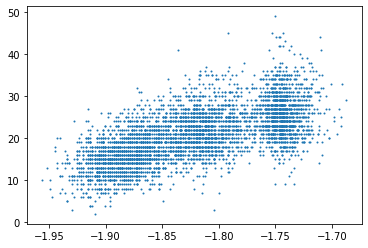

In [375]:
plt(-10/(np.log(data_mod["Wt"])),data_mod["BenchReps"], s=1)

Using the non-linear relationship of Wt to Benchpress it's possible to impute Bench Press values. However there is a large variance across the board even with the positive correlation, as such it might be best to add some Gaussian noise. This also follows from the Gaussian shape of the distribution

In [398]:
np.random.normal(data_mod.loc[data_mod["Pos"] != "OL","BenchReps"].mean(),data_mod.loc[data_mod["Pos"] != "OL","BenchReps"].std(),(1,1))

array([[23.9245396]])

In [421]:
data_mod.loc[(data_mod["Shuttle"] > 6) & (data_mod["pro bowl?"] == 1)].groupby("Pos")["Player"].count()

Pos
DL    2
OL    1
TE    1
Name: Player, dtype: int64

In [424]:
data_mod.loc[(data_mod["Shuttle"] < 5 ) & (data_mod["pro bowl?"] == 1)]

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Shuttle,pro bowl?
27,Tom Brady,QB,76,211,5.28,24.500000,NaN,99.0,4.38,1
31,Mike Brown,DB,70,204,4.59,36.000000,14.0,116.0,4.01,1
36,Marc Bulger,QB,74,208,4.97,30.736484,NaN,100.0,4.34,1
37,Keith Bulluck,LB,75,244,4.47,38.000000,NaN,119.0,4.13,1
57,Chad Clifton,OL,77,334,5.05,30.500000,24.0,102.0,4.73,1
...,...,...,...,...,...,...,...,...,...,...
5967,Leighton Vander esch,LB,76,256,4.65,39.500000,20.0,124.0,4.15,1
6091,Quenton Nelson,OL,77,325,NaN,26.500000,35.0,105.0,4.62,1
6158,Courtland Sutton,WR,75,218,4.54,35.500000,18.0,124.0,4.11,1
6185,Fred Warner,LB,75,236,4.64,38.500000,21.0,119.0,4.28,1


Hold on a second here... Nick Bosa is a standout player, but what caused this very out of range shuttle time? Upon doing some research, it appears there is actually *incorrect data* here. His time should be 4.14 which is very good for that size, and is more in line with the rest of his data. This calls in to question the shuttle outliers in the data outside of 6 seconds

In the original 2019 combine data .csv the Three Cone and Shuttle columns are mislabeled resulting in incorrect data being grouped together

In [483]:
fixed_data = pd.read_csv(root + "\\data\\fixed_2019_data.csv")

In [484]:
fixed_data = fixed_data[["Player","Cone","Shuttle"]]

In [485]:
data_mod = data_mod.merge(fixed_data, on='Player', how='left')

In [486]:
data_mod.loc[data_mod['Shuttle_y'].notna(), 'Shuttle_x'] = data_mod['Shuttle_y']

In [487]:
data_mod.loc[data_mod['Player'] == 'Nick Bosa']

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Shuttle_x,pro bowl?,Cone,Shuttle_y
6040,Nick Bosa,DL,76,266,4.79,33.5,29.0,116.0,4.14,1,7.1,4.14


In [489]:
data_mod.drop(["Shuttle_y","Cone"], axis=1, inplace=True)

Oops... Lost my data because pd.merge is **inner** by default while pd.join is **left** by default... luckily just running a few of the previous cells over gets back to where the data was (The beauty of Jupyter)

In [492]:
data_mod.rename(columns={"Shuttle_x": "Shuttle"}, inplace=True)

In [514]:
ProfileReport(data_mod, title="fixed Value Report").to_file("correct_values.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 62.73it/s]


In [494]:
data_mod.loc[data_mod["Shuttle"] > 6]

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Shuttle,pro bowl?
6015,Josh Allen-EDG,DL,77,262,4.63,34.342476,28.0,118.000000,7.15,1
6016,Zach Allen-DE,DL,76,281,5.00,32.000000,24.0,112.000000,7.34,0
6017,Bryson Allen-Williams,LB,73,236,4.88,31.691012,14.0,111.612605,7.40,0
6036,Mike Bell-S,DB,75,210,4.83,30.000000,10.0,118.000000,7.10,0
6056,Brian Burns,DL,77,249,4.53,36.000000,NaN,129.000000,7.01,0
6064,Malik Carney,DL,74,251,4.73,33.000000,25.0,113.000000,7.40,0
6083,Nate Davis-OG,OL,75,316,5.23,26.000000,23.0,107.000000,7.94,0
6119,Terry Godwin,WR,71,184,4.55,36.500000,NaN,117.000000,6.96,0
6165,Anthony Johnson-WR,WR,74,209,NaN,32.500000,18.0,122.000000,7.12,0
6196,Connor McGovern-OL,OL,77,308,NaN,NaN,28.0,112.000000,7.66,0


In [496]:
data_mod.loc[6015, "Shuttle"] = 4.23
data_mod.loc[6016, "Shuttle"] = 4.36
data_mod.loc[6017, "Shuttle"] = np.NaN
data_mod.loc[6036, "Shuttle"] = 4.46
data_mod.loc[6056, "Shuttle"] = np.NaN
data_mod.loc[6064, "Shuttle"] = np.NaN
data_mod.loc[6083, "Shuttle"] = 4.83
data_mod.loc[6119, "Shuttle"] = np.NaN
data_mod.loc[6165, "Shuttle"] = np.NaN
data_mod.loc[6196, "Shuttle"] = 4.57
data_mod.loc[6264, "Shuttle"] = 4.25

Use weight to impute benchreps, and then use Forty to impute Shuttle. Can add Gaussian Noise to benchreps (but need discrete values; cant have half of a rep)

In [500]:
impute_Bench = data_mod.loc[data_mod["Wt"].notna() & data_mod["BenchReps"].notna()]
impute_Shuttle = data_mod.loc[data_mod["Forty"].notna() & data_mod["Shuttle"].notna()]

In [504]:
X_Bench = impute_Bench["Wt"]
y_Bench = impute_Bench["BenchReps"]
X_Shuttle = impute_Shuttle["Forty"]
y_Shuttle = impute_Shuttle["Shuttle"]

In [505]:
impute_regressor = LinearRegression()
impute_regressor.fit(X_Bench.values.reshape(-1,1),y_Bench.values.reshape(-1,1))
empty_Bench_rows = data_mod.loc[data_mod["Wt"].notna() & data_mod["BenchReps"].isna()]
predicted_BenchReps = impute_regressor.predict(empty_Bench_rows["Wt"].values.reshape(-1,1))
data_mod.loc[data_mod["Wt"].notna() & data_mod["BenchReps"].isna(), "BenchReps"] = predicted_BenchReps

In [507]:
impute_regressor.fit(X_Shuttle.values.reshape(-1,1),y_Shuttle.values.reshape(-1,1))
empty_Shuttle_rows = data_mod.loc[data_mod["Forty"].notna() & data_mod["Shuttle"].isna()]
predicted_Shuttle = impute_regressor.predict(empty_Shuttle_rows["Forty"].values.reshape(-1,1))
data_mod.loc[data_mod["Forty"].notna() & data_mod["Shuttle"].isna(), "Shuttle"] = predicted_Shuttle

In [508]:
data_mod

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Shuttle,pro bowl?
0,John Abraham,LB,76,252,4.55,35.190945,21.139898,119.927667,4.226622,1
1,Shaun Alexander,RB,72,218,4.58,34.872769,18.085752,119.171752,4.246954,1
2,Darnell Alford,OL,76,334,5.56,25.000000,23.000000,94.000000,4.980000,0
3,Kyle Allamon,TE,74,253,4.97,29.000000,21.229726,104.000000,4.490000,0
4,Rashard Anderson,DB,74,206,4.55,34.000000,17.007819,123.000000,4.150000,0
...,...,...,...,...,...,...,...,...,...,...
6593,Charlie Woerner,TE,77,245,4.78,34.500000,21.000000,120.000000,4.460000,0
6594,D.J. Wonnum,DL,77,254,4.73,34.500000,20.000000,123.000000,4.440000,0
6595,Dom Wood-Anderson,TE,76,257,4.92,35.000000,21.589037,119.000000,4.477379,0
6596,David Woodward,LB,74,235,4.79,33.500000,16.000000,114.000000,4.370000,0


In [513]:
data_mod["BenchReps"] = data_mod["BenchReps"].round()

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Shuttle,pro bowl?
0,John Abraham,LB,76,252,4.55,35.190945,21.0,119.927667,4.226622,1
1,Shaun Alexander,RB,72,218,4.58,34.872769,18.0,119.171752,4.246954,1
2,Darnell Alford,OL,76,334,5.56,25.000000,23.0,94.000000,4.980000,0
3,Kyle Allamon,TE,74,253,4.97,29.000000,21.0,104.000000,4.490000,0
4,Rashard Anderson,DB,74,206,4.55,34.000000,17.0,123.000000,4.150000,0
...,...,...,...,...,...,...,...,...,...,...
6593,Charlie Woerner,TE,77,245,4.78,34.500000,21.0,120.000000,4.460000,0
6594,D.J. Wonnum,DL,77,254,4.73,34.500000,20.0,123.000000,4.440000,0
6595,Dom Wood-Anderson,TE,76,257,4.92,35.000000,22.0,119.000000,4.477379,0
6596,David Woodward,LB,74,235,4.79,33.500000,16.0,114.000000,4.370000,0


Now to create features and prep the data to be used as input

In [515]:
input_data = data_mod.copy()

In [517]:
input_data["WtVerticalRatio"] = input_data["Vertical"] / input_data["Wt"]
input_data["VertBenchRatio"] = input_data["BenchReps"] / input_data["Vertical"]
input_data["WtRepRatio"] = input_data["BenchReps"] / input_data["Wt"]
input_data["Wt40Ratio"] = 1 - (input_data["Forty"] / input_data["Wt"])

In [519]:
input_data["Ht"] = input_data.groupby("Pos").Ht.transform(lambda x: minmax_scale(x.astype(float)))
input_data["Wt"] = input_data.groupby("Pos").Wt.transform(lambda x: minmax_scale(x.astype(float)))
input_data["Forty"] = input_data.groupby("Pos").Forty.transform(lambda x: minmax_scale(x.astype(float)))
input_data["Forty"] = .99 - input_data["Forty"]
input_data["Vertical"] = input_data.groupby("Pos").Vertical.transform(lambda x: minmax_scale(x.astype(float)))
input_data["BenchReps"] = input_data.groupby("Pos").BenchReps.transform(lambda x: minmax_scale(x.astype(float)))
input_data["BroadJump"] = input_data.groupby("Pos").BroadJump.transform(lambda x: minmax_scale(x.astype(float)))
input_data["Shuttle"] = input_data.groupby("Pos").Shuttle.transform(lambda x: minmax_scale(x.astype(float)))
input_data["WtRepRatio"] = input_data.groupby("Pos").WtRepRatio.transform(lambda x: minmax_scale(x.astype(float)))
input_data["Wt40Ratio"] = input_data.groupby("Pos").Wt40Ratio.transform(lambda x: minmax_scale(x.astype(float)))
input_data["WtVerticalRatio"] = input_data.groupby("Pos").WtVerticalRatio.transform(lambda x: minmax_scale(x.astype(float)))
input_data["VertBenchRatio"] = input_data.groupby("Pos").VertBenchRatio.transform(lambda x: minmax_scale(x.astype(float)))

In [520]:
input_data["Pos"] = input_data.Pos.astype('category').cat.codes

In [531]:
input_data.fillna(value=input_data.mean(), inplace=True)

In [551]:
X_train, X_test, y_train, y_test = train_test_split(
    input_data.drop(["Player","pro bowl?"], axis=1),
    input_data["pro bowl?"], 
    random_state=42,
    stratify=input_data["pro bowl?"]
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.25,
    random_state=42,
    stratify=y_train
)

In [542]:
clf = GradientBoostingClassifier(n_estimators=500, learning_rate=1.0, max_depth=1, random_state=42).fit(X_train, y_train)
print("="*10 + "Gradient tree boosting" + "="*10)
print("Train score: " + str(clf.score(X_train, y_train)))
print("Val Score: " + str(clf.score(X_val,y_val)))
y_pred = clf.predict(X_val)
recall = recall_score(y_val,y_pred)
print("Recall: " + str(recall))
print("="*10 + "Random Forest" + "="*10)

rfclf = RandomForestClassifier(n_estimators=90, random_state=42, max_depth=1, class_weight={0: 1, 1: 10})
rfclf = rfclf.fit(X_train, y_train)
print("train score: " + str(rfclf.score(X_train, y_train)))
print("Val score: " + str(rfclf.score(X_val,y_val)))
y_pred = rfclf.predict(X_val)
recall = recall_score(y_val,y_pred)
print("Recall: " + str(recall))

print("="*10 + "Support Vector Machine" + "="*10)
svmclf = SVC(gamma='auto', random_state=42, class_weight={0: 1, 1: 15})
svmclf.fit(X_train,y_train)
print("train score: " + str(svmclf.score(X_train, y_train)))
print("Val score: " + str(svmclf.score(X_val,y_val)))
y_pred = svmclf.predict(X_val)
recall = recall_score(y_val,y_pred)
print("Recall: " + str(recall))

print("="*10 + "Logistic Regression" + "="*10)
lrclf = LogisticRegression(random_state=42, class_weight={0: 1, 1: 13}, max_iter=250)
lrclf.fit(X_train,y_train)
print("train score: " + str(lrclf.score(X_train, y_train)))
print("Val score: " + str(lrclf.score(X_val,y_val)))
y_pred = lrclf.predict(X_val)
recall = recall_score(y_val,y_pred)
print("Recall: " + str(recall))

==========Gradient tree boosting==========
Train score: 0.9288601455133387
Val Score: 0.910266774454325
Precision: 0.05825242718446602
==========Random Forest==========
train score: 0.7714901643761789
Val score: 0.7534357316087308
Precision: 0.44660194174757284
==========Support Vector Machine==========
train score: 0.43923470762597683
Val score: 0.43411479385610346
Precision: 0.883495145631068
==========Logistic Regression==========
train score: 0.551064403125842
Val score: 0.5464834276475343
Precision: 0.7766990291262136


In [543]:
from sklearn.metrics import confusion_matrix

In [567]:
print(np.array([
    ['True Neg', 'False Positive'],
    ['False Negative', 'True Positive']
]))
print("="*10 + "Gradient tree boosting" + "="*10)
y_pred = clf.predict(X_val)
print(confusion_matrix(y_val,y_pred))

print("="*10 + "Random Forest" + "="*10)
y_pred = rfclf.predict(X_val)
print(confusion_matrix(y_val,y_pred))

print("="*10 + "Support Vector Machine" + "="*10)
y_pred = svmclf.predict(X_val)
print(confusion_matrix(y_val,y_pred))

print("="*10 + "Logistic Regression" + "="*10)
y_pred = lrclf.predict(X_val)
print(confusion_matrix(y_val,y_pred))

[['True Neg' 'False Positive']
 ['False Negative' 'True Positive']]
==========Gradient tree boosting==========
[[1120   14]
 [  97    6]]
==========Random Forest==========
[[886 248]
 [ 57  46]]
==========Support Vector Machine==========
[[446 688]
 [ 12  91]]
==========Logistic Regression==========
[[596 538]
 [ 23  80]]


The SVM actually has the edge on Logistic Regression because of less False Negatives; remember, we're using this to gauge which players we should take a further look at. The only other problem is that the players it rejects are very few. So in essence it's very happy to say "hey this player looks like a pro bowler!" but since the evaluation metric heavily leaned on Recall over precision, this is to be expected.

If Logistic regression says 'Yes this player has pro bowl potential' then there's 13% chance that player could actually be one. Compare that to the most basic prediction that EVERYONE is a pro-bowler which gives you 10% correct predictions. On the other hand, would flipping a coin give the same result?

In [559]:
print("="*10 + "Coin flip prediction" + "="*10)
y_pred = np.random.randint(0,2,(y_train.shape))
print("train score: " + str((y_train == y_pred).sum() / y_train.count()))
y_pred = np.random.randint(0,2,(y_val.shape))
print("Val score: " + str((y_val == y_pred).sum() / y_val.count()))
recall = recall_score(y_val,y_pred)
print("Recall: " + str(recall))
print(confusion_matrix(y_val,y_pred))

==========Coin flip prediction==========
train score: 0.506332524925896
Val score: 0.49151172190784154
Recall: 0.4854368932038835
[[558 576]
 [ 53  50]]


Summing up: Cleaned up data, created new features fit several models to the data. Logistic regression and SVM work best. However comparing it to a random model there is some analysis that needs to be done. The trained models do have higher precision but because of the high precision 

(was misreading the confusion matrix)

8% of random selected are pro bowlers if positive prediction, but 11.6% on SVM and 12.9% on LR. However Random Forest has almost 16%. The only downside is that a larger number of actual pro bowlers are dismissed. That tool could be used however to really cull down the population and select only those that really give off the signs of being a pro bowler. Gradient tree Boosting has a 30% chance of being correct at the highest, at the cost of being the most picky about what is labeled positive; most of the actual positives are given a negative prediction. If the pool had to be drastically cut for in-depth follow up (Player meetings, individual workouts, extensive tape/footage review) then that model could actually be the most helpful.

In [580]:
importances = rfclf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfclf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

1. Forty (0.200000)
2. Shuttle (0.166667)
3. Wt40Ratio (0.133333)
4. BenchReps (0.122222)
5. Vertical (0.122222)
6. BroadJump (0.088889)
7. WtRepRatio (0.044444)
8. WtVerticalRatio (0.044444)
9. Ht (0.044444)
10. Wt (0.022222)
11. VertBenchRatio (0.011111)
12. Pos (0.000000)


After running feature analysis is appears that some of our features are not very helpful at all, including the created ones. Lets try to remove these features and then try to see if the results improve

In [587]:
reduced_data = input_data.drop(["VertBenchRatio","WtVerticalRatio","WtRepRatio","Pos","Player"], axis=1)

In [588]:
red_X_train, red_X_test, red_y_train, red_y_test = train_test_split(
    reduced_data.drop(["pro bowl?"], axis=1),
    reduced_data["pro bowl?"], 
    random_state=42,
    stratify=reduced_data["pro bowl?"]
)

red_X_train, red_X_val, red_y_train, red_y_val = train_test_split(
    red_X_train,
    red_y_train,
    test_size=0.25,
    random_state=42,
    stratify=red_y_train
)

In [589]:
red_clf = GradientBoostingClassifier(n_estimators=500, learning_rate=1.0, max_depth=1, random_state=42).fit(red_X_train, red_y_train)
print("="*10 + "Gradient tree boosting" + "="*10)
print("Train score: " + str(red_clf.score(red_X_train, red_y_train)))
print("Val Score: " + str(red_clf.score(red_X_val,red_y_val)))
red_y_pred = red_clf.predict(red_X_val)
recall = recall_score(red_y_val,red_y_pred)
print("Recall: " + str(recall))
print("="*10 + "Random Forest" + "="*10)

red_rfclf = RandomForestClassifier(n_estimators=90, random_state=42, max_depth=1, class_weight={0: 1, 1: 10})
red_rfclf = red_rfclf.fit(red_X_train, red_y_train)
print("train score: " + str(red_rfclf.score(red_X_train, red_y_train)))
print("Val score: " + str(red_rfclf.score(red_X_val,red_y_val)))
red_y_pred = red_rfclf.predict(red_X_val)
recall = recall_score(red_y_val,red_y_pred)
print("Recall: " + str(recall))

print("="*10 + "Support Vector Machine" + "="*10)
red_svmclf = SVC(gamma='auto', random_state=42, class_weight={0: 1, 1: 15})
red_svmclf.fit(red_X_train,red_y_train)
print("train score: " + str(red_svmclf.score(red_X_train, red_y_train)))
print("Val score: " + str(red_svmclf.score(red_X_val,red_y_val)))
red_y_pred = red_svmclf.predict(red_X_val)
recall = recall_score(red_y_val,red_y_pred)
print("Recall: " + str(recall))

print("="*10 + "Logistic Regression" + "="*10)
red_lrclf = LogisticRegression(random_state=42, class_weight={0: 1, 1: 13}, max_iter=250)
red_lrclf.fit(red_X_train,red_y_train)
print("train score: " + str(red_lrclf.score(red_X_train, red_y_train)))
print("Val score: " + str(red_lrclf.score(red_X_val,red_y_val)))
y_pred = red_lrclf.predict(red_X_val)
recall = recall_score(red_y_val,red_y_pred)
print("Recall: " + str(recall))

==========Gradient tree boosting==========
Train score: 0.9240097008892482
Val Score: 0.9135004042037187
Recall: 0.04854368932038835
==========Random Forest==========
train score: 0.7305308542171921
Val score: 0.7000808407437349
Recall: 0.5048543689320388
==========Support Vector Machine==========
train score: 0.4198329291296147
Val score: 0.4130962004850445
Recall: 0.8640776699029126
==========Logistic Regression==========
train score: 0.5432497978981407
Val score: 0.5448666127728375
Recall: 0.8640776699029126


In [604]:
print(np.array([
    ['True Neg', 'False Positive'],
    ['False Negative', 'True Positive']
]))
print("="*10 + "Gradient tree boosting" + "="*10)
y_pred = red_clf.predict(red_X_val)
print(confusion_matrix(red_y_val,y_pred))

print("="*10 + "Random Forest" + "="*10)
y_pred = red_rfclf.predict(red_X_val)
print(confusion_matrix(red_y_val,y_pred))

print("="*10 + "Support Vector Machine" + "="*10)
y_pred = red_svmclf.predict(red_X_val)
print(confusion_matrix(red_y_val,y_pred))

print("="*10 + "Logistic Regression" + "="*10)
y_pred = red_lrclf.predict(red_X_val)
print(confusion_matrix(red_y_val,y_pred))

[['True Neg' 'False Positive']
 ['False Negative' 'True Positive']]
==========Gradient tree boosting==========
[[1125    9]
 [  98    5]]
==========Random Forest==========
[[814 320]
 [ 51  52]]
==========Support Vector Machine==========
[[422 712]
 [ 14  89]]
==========Logistic Regression==========
[[598 536]
 [ 27  76]]


In [594]:
print('Gradient Tree Positive: %f' % (5/(9+5)))
print('Random Forest Positive: %f' % (52/(320 + 52)))
print('SVM Positive: %f' % (89/(89 + 712)))
print('Logistic Reg. Positive: %f' % (76 / (536 + 76)))
print('Random Positive: %f' % (50 / (576 + 50)))

Gradient Tree Positive: 0.357143
Random Forest Positive: 0.139785
SVM Positive: 0.111111
Logistic Reg. Positive: 0.124183
Random Positive: 0.079872


In [595]:
input_data.loc[input_data["Player"] == "Tom Brady"]

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Shuttle,pro bowl?,WtVerticalRatio,VertBenchRatio,WtRepRatio,Wt40Ratio
23,Tom Brady,5,0.666667,0.197917,0.913462,0.162162,0.4,0.216216,0.51,1,0.214633,0.623633,0.462542,0.004159


In [597]:
reduced_data.loc[23]

Ht           0.666667
Wt           0.197917
Forty        0.913462
Vertical     0.162162
BenchReps    0.400000
BroadJump    0.216216
Shuttle      0.510000
pro bowl?    1.000000
Wt40Ratio    0.004159
Name: 23, dtype: float64

In [602]:
red_svmclf.predict(reduced_data.loc[23].drop("pro bowl?").values.reshape(1,-1))

array([0], dtype=int64)

In [607]:
input_data.loc[input_data["Pos"] == 5]

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Shuttle,pro bowl?,WtVerticalRatio,VertBenchRatio,WtRepRatio,Wt40Ratio
23,Tom Brady,5,0.666667,0.197917,0.913462,0.162162,0.400000,0.216216,0.510000,1,0.214633,0.623633,0.462542,0.004159
25,Travis Brown-01,5,0.555556,0.270833,0.653846,0.405405,0.466667,0.270270,1.000000,0,0.385452,0.478537,0.493267,0.303330
32,Marc Bulger,5,0.444444,0.166667,0.615385,0.499269,0.400000,0.243243,0.470000,1,0.534358,0.344518,0.480393,0.169632
34,Bill Burke,5,0.666667,0.145833,0.673077,0.378378,0.400000,0.432432,0.550000,0,0.439201,0.430564,0.492582,0.092974
39,Giovanni Carmazzi,5,0.555556,0.333333,0.394231,0.810811,0.533333,0.756757,0.360000,0,0.687615,0.280005,0.527871,0.570108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6477,Steven Montez,5,0.666667,0.500000,0.336538,0.621622,0.600000,0.702703,0.560000,0,0.430621,0.449535,0.505011,0.813412
6479,James Morgan,5,0.666667,0.218750,0.538462,0.405405,0.466667,0.567568,0.770000,0,0.416989,0.478537,0.523041,0.306833
6500,Shea Patterson,5,0.333333,0.104167,0.365385,0.513514,0.400000,0.675676,0.630000,0,0.591861,0.335197,0.517686,0.254224
6541,Nate Stanley,5,0.666667,0.531250,0.461538,0.378378,0.600000,0.459459,0.610000,0,0.226451,0.639249,0.489207,0.770305


In [ ]:
data = res.json()
user_input = np.array([
    data.Ht,
    data.Wt,
    data.Pos,
    data.Forty,
    data.Vertical,
    data.BenchReps,
    data.BroadJump,
    data.Shuttle,
    data.Forty / data.Wt
])


need a way to save the model and everything that's been gathered so far. Using python pickle; should save all the training data, test data, and specific models as is right now. Then can try and optimize

In [ ]:
[['True Neg' 'False Positive']
 ['False Negative' 'True Positive']]
==========Gradient tree boosting==========
[[1125    9]
 [  98    5]]
==========Random Forest==========
[[814 320]
 [ 51  52]]
==========Support Vector Machine==========
[[422 712]
 [ 14  89]]
==========Logistic Regression==========
[[598 536]
 [ 27  76]]

In [7]:
((1125 * 5) - (9*98)) / 44720

0.10605992844364938

In [8]:
((814 * 52) - (51 * 320)) / np.sqrt((320+52)*(52 + 51)*(814+320)*(814+51))

0.1341535881893026

In [9]:
((422 * 89) - (14 * 712)) / np.sqrt((422+712)*(422+14)*(89+712)*(89+14))

0.1366051454896227

In [10]:
((598 * 76) - (27 *536)) / np.sqrt((598+536)*(598+27)*(76+536)*(76+27))

0.14654954562514186

In [ ]:
#coin flip
[[558 576]
 [ 53  50]]

In [11]:
((558*50) - (576*53)) / np.sqrt((558+53)*(558+576)*(50+576)*(50+53))

-0.012433472826299275